# Algoritmos de optimización - Reto 2

Nombre: RAÚL MURILLO AGLLEGO<br>
Github: [Repositorio de la actividad](https://github.com/RaulMGallego/03MAIR-Algoritmos-de-Optimizacion-2024/blob/main/ALGORITMOS_R2/Algoritmos_R2_Raul_MurilloGallego.ipynb)<br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

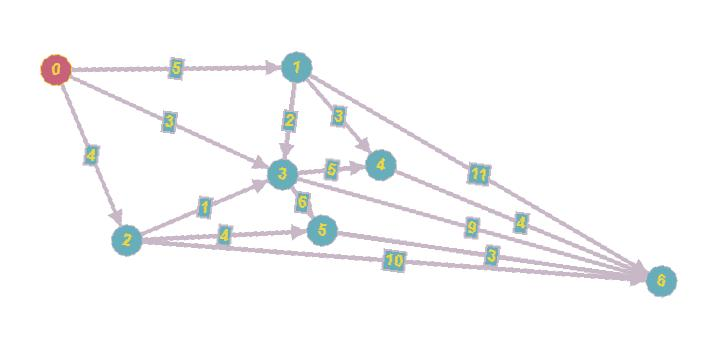

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [17]:
#Viaje por el rio - Programación dinámica
################################################################################
class Graph:
    def __init__(self, vertices):
        self.V = vertices  # Número de nodos
        self.edges = []  # Lista de aristas (u, v, peso)
    
    def add_edge(self, u, v, weight):
        self.edges.append((u, v, weight))
    
    def bellman_ford(self, src):
        # Paso 1: Inicializar distancias con infinito, excepto el origen
        dist = [float("inf")] * self.V
        dist[src] = 0
        predecessor = [-1] * self.V  # Para reconstruir el camino
        
        # Paso 2: Relajar todas las aristas (V-1) veces
        for _ in range(self.V - 1):
            for u, v, weight in self.edges:
                if dist[u] != float("inf") and dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
                    predecessor[v] = u  # Guardar el predecesor
        
        # Paso 3: Comprobar ciclos negativos
        for u, v, weight in self.edges:
            if dist[u] != float("inf") and dist[u] + weight < dist[v]:
                print("El grafo contiene un ciclo de peso negativo")
                return None, None
        
        return dist, predecessor

    def reconstruct_path(self, src, dest, predecessor):
        path = []
        current = dest
        while current != -1:
            path.append(current)
            current = predecessor[current]
        path.reverse()
        return path if path[0] == src else []

# Creación del grafo basado en la imagen
graph = Graph(7)  # 7 nodos (de 0 a 6)
graph.add_edge(0, 1, 5)
graph.add_edge(0, 2, 4)
graph.add_edge(1, 3, 2)
graph.add_edge(2, 3, 1)
graph.add_edge(2, 5, 4)
graph.add_edge(3, 4, 5)
graph.add_edge(3, 6, 6)
graph.add_edge(4, 6, 11)
graph.add_edge(5, 6, 10)
graph.add_edge(1, 4, 3)
graph.add_edge(3, 5, 6)
graph.add_edge(5, 6, 9)
graph.add_edge(4, 6, 4)
graph.add_edge(3, 6, 3)

# Ejecutar Bellman-Ford desde el nodo 0
distances, predecessors = graph.bellman_ford(0)

# Mostrar resultados
if distances:
    print("Distancias mínimas desde el nodo 0:")
    for i, d in enumerate(distances):
        print(f"Nodo {i}: {d}")
    
    # Mostrar la ruta más barata hasta el nodo 6
    print(f"")
    path = graph.reconstruct_path(0, 6, predecessors)
    print("Ruta más barata de 0 a 6:", " -> ".join(map(str, path)))



Distancias mínimas desde el nodo 0:
Nodo 0: 0
Nodo 1: 5
Nodo 2: 4
Nodo 3: 5
Nodo 4: 8
Nodo 5: 8
Nodo 6: 8

Ruta más barata de 0 a 6: 0 -> 2 -> 3 -> 6


## Descenso del gradiente

In [1]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [3]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

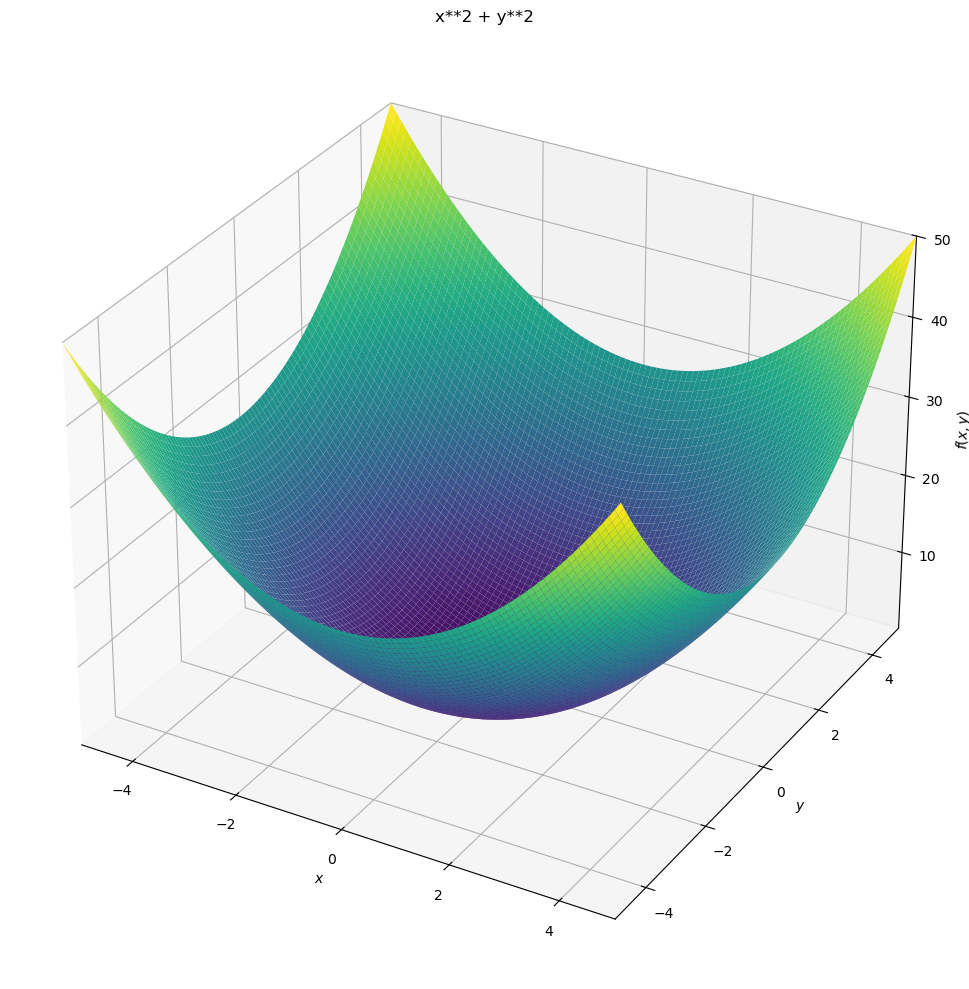

In [5]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

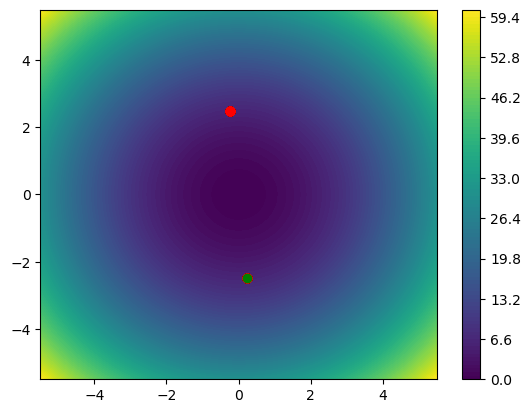

Solucion: [0.22641852137369778, -2.4774058722259196] 6.188805202560521


In [7]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
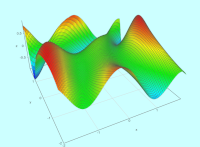


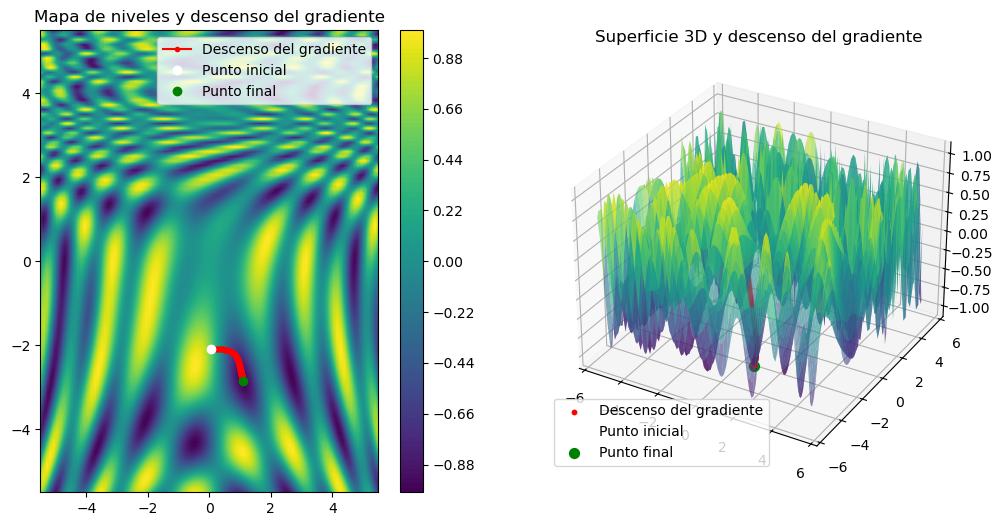

Solución: [1.0996533997093563, -2.852242448821925] -0.9999999999995518


In [33]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

import math                      # Funciones matemáticas
import matplotlib.pyplot as plt  # Generación de gráficos
import numpy as np               # Tratamiento de matrices N-dimensionales
import random                    # Generación de números aleatorios
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D

# Definimos la función
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Gradiente de la función (calculado manualmente)
df = lambda X: [
    math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1])) * X[0] -
    math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * 2,
    math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1])) * (-1/2 * X[1]) -
    math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * (-math.exp(X[1]))
]

# Prepara los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)

for ix in range(resolucion):
    for iy in range(resolucion):
        Z[ix, iy] = f([X[ix, iy], Y[ix, iy]])

# Generamos un punto aleatorio inicial
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
P_history = [P.copy()]  # Guardamos el historial de puntos para graficar

# Tasa de aprendizaje
TA = 0.01

# Iteraciones: 1000
for _ in range(1000):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    P_history.append(P.copy())  # Guardamos el historial de puntos

# Convertimos el historial de puntos en un array de numpy para graficar
P_history = np.array(P_history)

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 6))

# Gráfico 2D: Mapa de niveles
ax1 = fig.add_subplot(121)
contour = ax1.contourf(X, Y, Z, resolucion, cmap='viridis')
fig.colorbar(contour, ax=ax1)  # Añadir colorbar al gráfico 2D
ax1.plot(P_history[:, 0], P_history[:, 1], "o-", c="red", markersize=3, label="Descenso del gradiente")
ax1.plot(P_history[0, 0], P_history[0, 1], "o", c="white", label="Punto inicial")
ax1.plot(P_history[-1, 0], P_history[-1, 1], "o", c="green", label="Punto final")
ax1.set_title("Mapa de niveles y descenso del gradiente")
ax1.legend()

# Gráfico 3D: Superficie y descenso del gradiente
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax2.scatter(P_history[:, 0], P_history[:, 1], [f(p) for p in P_history], c="red", s=10, label="Descenso del gradiente")
ax2.scatter(P_history[0, 0], P_history[0, 1], f(P_history[0]), c="white", s=50, label="Punto inicial")
ax2.scatter(P_history[-1, 0], P_history[-1, 1], f(P_history[-1]), c="green", s=50, label="Punto final")
ax2.set_title("Superficie 3D y descenso del gradiente")
ax2.legend()

plt.show()

print("Solución:", P, f(P))


In [ ]:
"""
Mejoras:
Tasa de Aprendizaje (TA):
- Dado que la función es más compleja, reducimos la tasa de aprendizaje a 0.01 para evitar oscilaciones o divergencias.
Mapa de Niveles:
- Se genera un mapa de niveles de la función f(X) para visualizar la superficie.
Punto Inicial:
- Se genera un punto aleatorio inicial dentro del rango [−5,5].
Descenso del Gradiente:
- En cada iteración, se actualiza la posición del punto P utilizando el gradiente y la tasa de aprendizaje.
- Se grafican los puntos intermedios en rojo y el punto final en verde.
Visualización:
- Se muestra el mapa de niveles con los puntos intermedios y el punto final